<a href="https://colab.research.google.com/github/usharani49/YBI-Foundation-Course/blob/main/handson1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predictive Analytics(Mileage Prediction)**

**Import Library**

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

**Import Data**

In [ ]:
df=pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/MPG.csv')

In [ ]:
df.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino

In [ ]:
df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64

**Data Preprocessing**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [ ]:
df.describe()

mpg   cylinders  displacement  horsepower       weight  \
count  398.000000  398.000000    398.000000  392.000000   398.000000   
mean    23.514573    5.454774    193.425879  104.469388  2970.424623   
std      7.815984    1.701004    104.269838   38.491160   846.841774   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.500000    4.000000    104.250000   75.000000  2223.750000   
50%     23.000000    4.000000    148.500000   93.500000  2803.500000   
75%     29.000000    8.000000    262.000000  126.000000  3608.000000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration  model_year  
count    398.000000  398.000000  
mean      15.568090   76.010050  
std        2.757689    3.697627  
min        8.000000   70.000000  
25%       13.825000   73.000000  
50%       15.500000   76.000000  
75%       17.175000   79.000000  
max       24.800000   82.000000

In [ ]:
df.corr()

mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.775396     -0.804203   -0.778427 -0.831741   
cylinders    -0.775396   1.000000      0.950721    0.842983  0.896017   
displacement -0.804203   0.950721      1.000000    0.897257  0.932824   
horsepower   -0.778427   0.842983      0.897257    1.000000  0.864538   
weight       -0.831741   0.896017      0.932824    0.864538  1.000000   
acceleration  0.420289  -0.505419     -0.543684   -0.689196 -0.417457   
model_year    0.579267  -0.348746     -0.370164   -0.416361 -0.306564   

              acceleration  model_year  
mpg               0.420289    0.579267  
cylinders        -0.505419   -0.348746  
displacement     -0.543684   -0.370164  
horsepower       -0.689196   -0.416361  
weight           -0.417457   -0.306564  
acceleration      1.000000    0.288137  
model_year        0.288137    1.000000

**Remove Missing Values**

In [ ]:
df=df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


**Data Visualization**

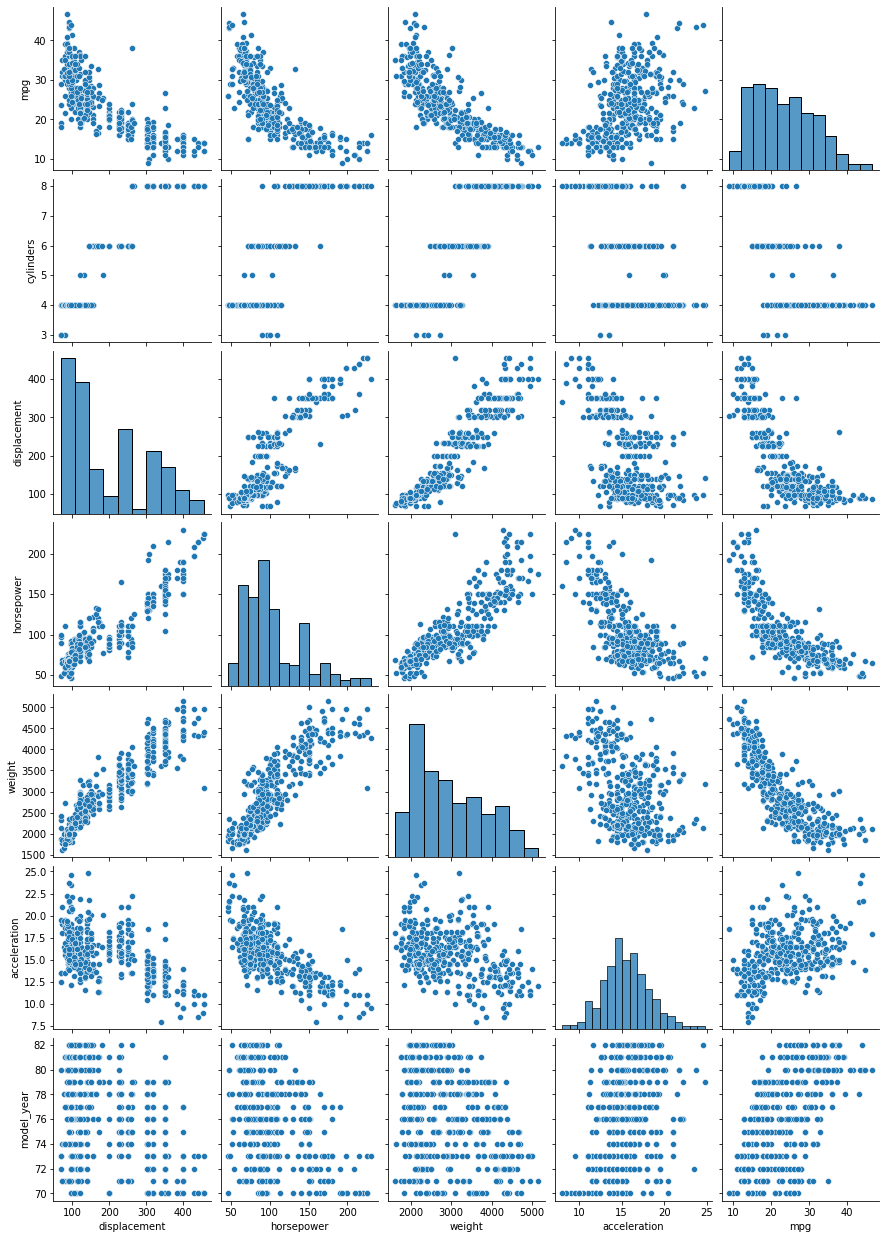

In [ ]:
sns.pairplot(df,x_vars=['displacement','horsepower','weight','acceleration','mpg'])

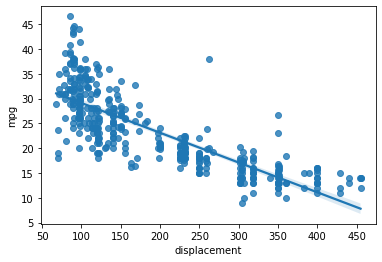

In [ ]:
sns.regplot(x='displacement',y='mpg',data=df)

**Define Target Variable y and Feature X**

In [ ]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [ ]:
y=df['mpg']

In [ ]:
y.shape

(392,)

In [ ]:
X=df[['displacement','horsepower','weight','acceleration']]

In [ ]:
X.shape

(392, 4)

**Scaling Data**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
ss=StandardScaler()

In [ ]:
X=ss.fit_transform(X)

In [ ]:
X

array([[ 1.07728956,  0.66413273,  0.62054034, -1.285258  ],
       [ 1.48873169,  1.57459447,  0.84333403, -1.46672362],
       [ 1.1825422 ,  1.18439658,  0.54038176, -1.64818924],
       ...,
       [-0.56847897, -0.53247413, -0.80463202, -1.4304305 ],
       [-0.7120053 , -0.66254009, -0.41562716,  1.11008813],
       [-0.72157372, -0.58450051, -0.30364091,  1.40043312]])

In [ ]:
pd.DataFrame(X).describe()

0             1             2             3
count  3.920000e+02  3.920000e+02  3.920000e+02  3.920000e+02
mean  -2.537653e-16 -4.392745e-16  5.607759e-17  6.117555e-16
std    1.001278e+00  1.001278e+00  1.001278e+00  1.001278e+00
min   -1.209563e+00 -1.520975e+00 -1.608575e+00 -2.736983e+00
25%   -8.555316e-01 -7.665929e-01 -8.868535e-01 -6.410551e-01
50%   -4.153842e-01 -2.853488e-01 -2.052109e-01 -1.499869e-02
75%    7.782764e-01  5.600800e-01  7.510927e-01  5.384714e-01
max    2.493416e+00  3.265452e+00  2.549061e+00  3.360262e+00

In [ ]:
pd.DataFrame(X).describe()

0             1             2             3
count  3.920000e+02  3.920000e+02  3.920000e+02  3.920000e+02
mean  -2.537653e-16 -4.392745e-16  5.607759e-17  6.117555e-16
std    1.001278e+00  1.001278e+00  1.001278e+00  1.001278e+00
min   -1.209563e+00 -1.520975e+00 -1.608575e+00 -2.736983e+00
25%   -8.555316e-01 -7.665929e-01 -8.868535e-01 -6.410551e-01
50%   -4.153842e-01 -2.853488e-01 -2.052109e-01 -1.499869e-02
75%    7.782764e-01  5.600800e-01  7.510927e-01  5.384714e-01
max    2.493416e+00  3.265452e+00  2.549061e+00  3.360262e+00

**Train Test Split Data**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=2525)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((274, 4), (118, 4), (274,), (118,))

**Linear Regression Model**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
lr.intercept_

23.6889216106858

In [ ]:
lr.coef_

array([-0.13510042, -1.4297211 , -5.23891463,  0.22436094])

### Mileage = 23.4 - 1.05 Displacement - 1.68 Horsepower - 4.10 Weight - + error ###

**Predict Test Data**

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
y_pred

array([25.24954801, 26.85525431, 26.58882904, 29.48052754, 23.91216916,
       14.9529791 , 30.0607685 , 34.07634195, 30.550342  , 11.31024173,
       18.14067535, 18.75305197, 29.80678264, 33.19954312, 17.23635872,
       16.06983768, 25.94812038, 21.15777548, 29.92508087, 25.05587641,
       22.85575427, 30.96630956, 22.82202336, 24.04513247, 25.95102384,
       26.21136844, 14.91805111, 31.85928917, 21.95227216, 26.85446824,
        8.94214825, 26.21244694, 30.20552304,  7.15733458, 26.31771126,
       30.54356872, 14.13603243, 31.02810818, 33.19140036, 31.74995879,
       11.07428823, 30.50398808, 29.36195486, 31.022648  , 23.53384962,
       22.87821543, 11.03531446, 14.3757476 , 31.44484893, 26.64255441,
       27.96470623, 21.80486111, 20.32272978, 31.27632871, 24.83127389,
       19.13391479, 28.2786737 , 25.21468804, 26.89045676, 28.76603057,
       19.03600671, 29.49310219, 28.42147856, 26.6112997 ,  7.384747  ,
       20.13152225, 22.77931428, 20.50765035, 32.81875326, 27.92

**Model Accuracy**

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,r2_score

In [ ]:
mean_absolute_error(y_test,y_pred)

3.417654680078563

In [ ]:
mean_absolute_percentage_error(y_test,y_pred)

0.16282215595698368

In [ ]:
r2_score(y_test,y_pred)

0.6767436309121446

**Polynomial Regression**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly = PolynomialFeatures(degree=2,interaction_only=True,include_bias=False)

In [ ]:
X_train2 = poly.fit_transform(X_train)

In [ ]:
X_test2 = poly.fit_transform(X_test)

In [ ]:
lr.fit(X_train2,y_train)

LinearRegression()

In [ ]:
lr.intercept_

21.457120355191684

In [ ]:
lr.coef_

array([-1.97594907e+00, -5.50639326e+00, -1.82341405e+00, -8.04049934e-01,
        1.55534517e+00, -4.40583099e-01, -5.33735335e-01,  1.29466895e+00,
        2.61553723e-03,  5.86761939e-01])

In [ ]:
y_pred_poly = lr.predict(X_test2)

# Model Accuracy ##

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,r2_score

In [ ]:
mean_absolute_error(y_test,y_pred_poly)

2.9240072424474577

In [ ]:
mean_absolute_percentage_error(y_test,y_pred_poly)

0.12874881331071994

In [ ]:
r2_score(y_test,y_pred_poly)

0.7198303534964865

## Hand Written Digit Prediction - Classification Analysis ##

#### The digits dataset consists of 8x8 pixel images of digits.The images attribute of the dataset stores 8x8 arrays of grayscale values for each image.We will use these arrays to visualize the first 4 images.The target attribute of the dataset stores the digit each image represents. ####

## Import Library ##

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

## Import Data

In [ ]:
from sklearn.datasets import load_digits

In [ ]:
df = load_digits()

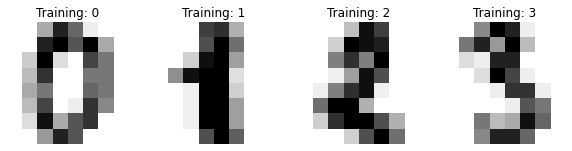

In [ ]:
_, axes = plt.subplots(nrows=1,ncols=4,figsize=(10,3))
for ax,image, label in zip(axes,df.images,df.target) :
    ax.set_axis_off()
    ax.imshow(image,cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

## Data Preprocessing ##

#### flatten image ####

In [ ]:
df.images.shape

(1797, 8, 8)

In [ ]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [ ]:
df.images[0].shape

(8, 8)

In [ ]:
n_samples = len(df.images)
data = df.images.reshape((n_samples,-1))

In [ ]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [ ]:
data[0].shape

(64,)

In [ ]:
data.shape

(1797, 64)

# Scaling Data #

In [ ]:
data.min()

0.0

In [ ]:
data.max()

16.0

In [ ]:
data = data/16

In [ ]:
data.min()

0.0

In [ ]:
data.max()

1.0

In [ ]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

## Train Test Split Data  ##

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(data,df.target,test_size=0.7,random_state=2525)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((539, 64), (1258, 64), (539,), (1258,))

## Random Forest Model ##

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(X_train,y_train)

RandomForestClassifier()

## Predict Test Data ##

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
y_pred

array([9, 9, 9, ..., 4, 6, 2])

## Model Accuracy ##

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
confusion_matrix(y_test,y_pred)

array([[121,   0,   0,   0,   1,   0,   0,   0,   0,   0],
       [  0, 126,   0,   2,   0,   0,   0,   0,   0,   1],
       [  1,   0, 119,   0,   0,   0,   0,   0,   2,   1],
       [  0,   1,   0, 123,   0,   0,   0,   2,   0,   0],
       [  0,   1,   0,   0, 121,   0,   0,   1,   1,   0],
       [  0,   0,   0,   1,   1, 119,   1,   0,   1,   7],
       [  2,   3,   0,   0,   0,   0, 122,   0,   1,   0],
       [  0,   0,   0,   0,   2,   0,   0, 123,   1,   1],
       [  0,   7,   2,   1,   1,   0,   0,   1, 113,   1],
       [  0,   0,   0,   6,   0,   0,   0,   1,   4, 112]])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       122
           1       0.91      0.98      0.94       129
           2       0.98      0.97      0.98       123
           3       0.92      0.98      0.95       126
           4       0.96      0.98      0.97       124
           5       1.00      0.92      0.96       130
           6       0.99      0.95      0.97       128
           7       0.96      0.97      0.96       127
           8       0.92      0.90      0.91       126
           9       0.91      0.91      0.91       123

    accuracy                           0.95      1258
   macro avg       0.95      0.95      0.95      1258
weighted avg       0.95      0.95      0.95      1258

